## Классификация при помощи CNN.
На занятии по классификации временных рядов мы разобрали подход, основанный на мере расстояния DTW. Другое семейство алгоритмов основано на вычислении признаков по скользящему окну, например, автоматическая генерация признаков при помощи CNN. В задании вам предлагается разработать baseline решение для классификации рядов из датасета human activity recognition (https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) при помощи CNN сети. В качестве базовой архитектуры будем использовать наработки с семинара по предсказанию при помощи CNN, где в последнем слое используется softmax в качестве функции активации.

In [1]:
import sys
import pathlib

sys.path.append(str(pathlib.Path().cwd().parent))

In [3]:
from typing import Tuple

In [7]:
import numpy as np
import pandas as pd
import keras
from keras.utils import to_categorical

### 1. Считаем данные  
- Фичи сразу решейпнем, добавив размерность для свёрточного слоя  
- Лейблы принимают значения от 1 до 6. Для корректного расчёта моделью мы отнимем от ниx 1 (превратим в range(6)) и заэнкодим в категориальный таргет.

In [ ]:
C:\Users\бббюбб\ts_spring\data\UCI HAR Dataset\train

In [ ]:
C:/Users/бббюбб/ts_spring/data/UCI_HAR_dataset/train/X_train.txt'


In [25]:
def read_data(train_or_test: str) -> Tuple[np.array, np.array]:
    a = []
    with open(f'C:/Users/бббюбб/ts_spring/data/UCI_HAR_dataset/{train_or_test}/X_{train_or_test}.txt', 'r') as f:
        for line in f:
            a.append([float(i) for i in line.strip().split()])

    X = np.vstack(a)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    y = to_categorical(
        np.loadtxt(f'../data/UCI_HAR_dataset/{train_or_test}/y_{train_or_test}.txt', delimiter=' ') - 1
    )
    
    return X, y

In [26]:
X_train, y_train = read_data('train')
X_test, y_test = read_data('test')

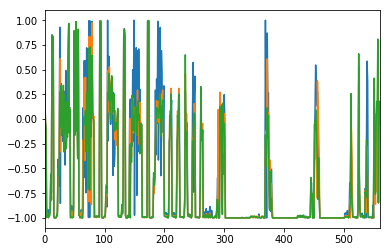

In [29]:
pd.Series(X_train[0].flatten()).plot()
pd.Series(X_train[1].flatten()).plot()
pd.Series(X_train[2].flatten()).plot()

In [30]:
y_train[1], y_train[2], y_train[3]

(array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0.], dtype=float32))

### 2. Постройте базовую CNN модель.

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import Callback
from tqdm.notebook import tqdm

1. Задайте модель Sequential
2. Добавьте входной сверточный слой Conv1D (укажите нужный input_shape)
3. Добавьте слой Flatten, чтобы можно было передать выход со сверточного слоя на вход полносвязному
4. Добавьте полносвязный слой с софтмаксом
5. Соберите модель, в качестве метода оптимизации укажите adam, в качестве функции потерь категориальную кроссэнтропию.
6. Обучите модель
7. Сделайте прогноз и выведите classification_report

In [39]:
# your code here

model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(561,1)))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [40]:
class my_tqdm_callback(Callback):
    def on_train_begin(self, logs=None):
        print('Start train')
    def on_epoch_end(self, epoch, logs=None):
        pbar.update()
    def on_train_end(self, logs=None):
        print('Train completed successfully!')

In [41]:
EPOCHS = 100
pbar = tqdm(total=EPOCHS, desc='CNN train')
model.fit(X_train, y_train, epochs=EPOCHS, verbose=0, callbacks=[my_tqdm_callback()]);

CNN train:   0%|          | 0/100 [00:00<?, ?it/s]


Start train
Train completed successfully!


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))
print('Confusion matrix:\n',confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       496
           1       0.92      0.98      0.95       471
           2       0.99      0.95      0.97       420
           3       0.98      0.91      0.94       491
           4       0.93      0.98      0.95       532
           5       0.99      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion matrix:
 [[474  18   4   0   0   0]
 [  9 460   2   0   0   0]
 [  3  18 399   0   0   0]
 [  0   2   0 448  38   3]
 [  1   0   0  11 520   0]
 [  0   0   0   0   0 537]]


### 3. Попробуйте добавить дополнительный свероточный слой, MaxPooling, и пару промежуточных полносвязный слоев. 

In [43]:
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(561,1)))
model.add(Conv1D(32, 4, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [44]:
EPOCHS = 100
pbar = tqdm(total=EPOCHS, desc='CNN train')
model.fit(X_train, y_train, epochs=EPOCHS, verbose=0, callbacks=[my_tqdm_callback()]);

CNN train:   0%|          | 0/100 [00:00<?, ?it/s]

Start train
Train completed successfully!


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))
print('Confusion matrix:\n',confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       496
           1       0.89      0.93      0.91       471
           2       0.99      0.90      0.94       420
           3       0.96      0.89      0.92       491
           4       0.91      0.97      0.94       532
           5       0.99      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947

Confusion matrix:
 [[482  11   3   0   0   0]
 [ 32 437   1   0   1   0]
 [  3  41 376   0   0   0]
 [  0   2   0 435  49   5]
 [  1   0   0  16 515   0]
 [  0   0   0   0   0 537]]


### 4. Попробуйте сравнить качество с базовым dtw, используя fastdtw.

In [7]:
import fastdtw

#### Напишите функцию get_label, возвращающую соответсвующий класс для ряда из X_test
* принимает на вход ряд из X_test
* проходится по всем рядам из X_train
* считает dtw
* возвращает y из y_train, соответвующий минимальному dtw

In [10]:
def get_label(ts_test: np.array) -> np.array:
    # your code here
    
    return min_y

#### Пройдитесь по 50-100 рядам из X_test (примерное время 5-15 минут) и оцените точность классификации

In [11]:
# your code here